In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_regression import nonlin_data, plot_scatter
import matplotlib.pyplot as plt

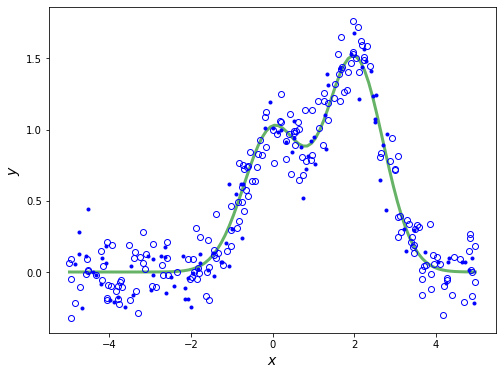

In [3]:
X_train, y_train, X_test, y_test, f_truth= nonlin_data(300)

plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, X_test, y_test, f=f_truth)
plt.show()

## 逐段线性

In [4]:
import numpy as np

In [5]:
x = X_train.copy()
y = y_train.copy().reshape(-1, 1)
# 设置分割点xi
xi1 = -2
xi2 = 0.1
xi3 = 0.8
xi4 = 2.1

# 分割变量
split1 = x < xi1
split2 = (x >= xi1) & (x < xi2)
split3 = (x >= xi2) & (x < xi3)
split4 = (x >= xi3) & (x < xi4)
split5 = x > xi4
x1 = x[split1]
x2 = x[split2]
x3 = x[split3]
x4 = x[split4]
x5 = x[split5]
y1 = y[split1]
y2 = y[split2]
y3 = y[split3]
y4 = y[split4]
y5 = y[split5]

y_mean1 = y1.mean()
y_mean2 = y2.mean()
y_mean3 = y3.mean()
y_mean4 = y4.mean()
y_mean5 = y5.mean()

In [6]:
y1_centered = y1 - y_mean1
y2_centered = y2 - y_mean2
y3_centered = y3 - y_mean3
y4_centered = y4 - y_mean4
y5_centered = y5 - y_mean5

beta1 = (y1_centered @ x1) / np.sum(x1**2)
beta2 = (y2_centered @ x2) / np.sum(x2**2)
beta3 = (y3_centered @ x3) / np.sum(x3**2)
beta4 = (y4_centered @ x4) / np.sum(x4**2)
beta5 = (y5_centered @ x5) / np.sum(x5**2)

y_pred1 = beta1 * x1 + y_mean1
y_pred2 = beta2 * x2 + y_mean2
y_pred3 = beta3 * x3 + y_mean3
y_pred4 = beta4 * x4 + y_mean4
y_pred5 = beta5 * x5 + y_mean5

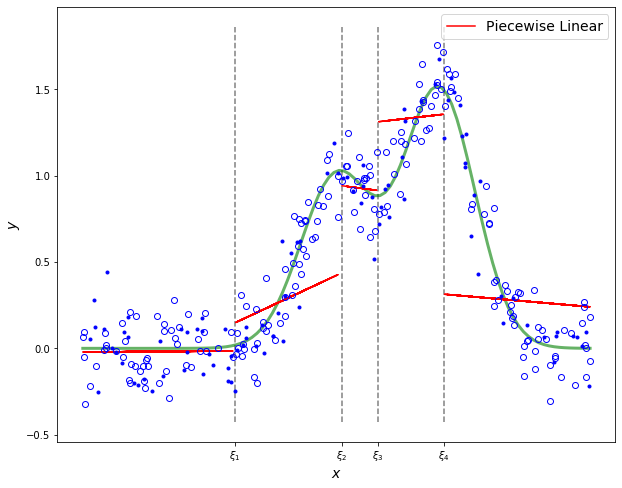

In [8]:
plt.figure(figsize=(10, 8))
plot_scatter(X_train, y_train, X_test, y_test, f=f_truth)
ylim_min = plt.ylim()[0]
ylim_max = plt.ylim()[1]
plt.vlines(xi1, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi2, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi3, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(xi4, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.plot(x1, y_pred1, 'r', label="Piecewise Linear")
plt.plot(x2, y_pred2, 'r')
plt.plot(x3, y_pred3, 'r')
plt.plot(x4, y_pred4, 'r')
plt.plot(x5, y_pred5, 'r')
plt.xticks(ticks=[xi1, xi2, xi3, xi4],
           labels=[r'$\xi_1$', r'$\xi_2$', r'$\xi_3$', r'$\xi_4$'])
plt.legend(fontsize=14)
plt.show()